# Lab-3


In [160]:
# Знайомство з нейромережами (Framework: TensorFlow2 + Keras, можно використовувати Pytorch)

# 1. Повнозв'язані нейронні мережі
# Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній № 1 за допомогою повнозв’язаної нейромережі прямого поширення (fully connected feed-forward network). Результати порівняйте з одержаними раніше. 

# 2. Згорткові нейронні мережі
# Вирішіть завдання класифікації зображень за допомогою згорткової (convolutional) нейромережі (якщо в обраному датасеті класів забагато, достатньо залишити 3-5).

# 3. Рекурентні нейронні мережі
# Вирішіть задачу класифікації текстів (з якими ви працювали в лабораторній № 2) за допомогою рекурентної нейромережі. Результати порівняйте з одержаними раніш. 

# Датасети для завдання № 2 (MNIST та CIFAR-10 не використовувати) можна брати тут:
# https://www.kaggle.com/tags/image-data
# Як звіт – робочий код в Jupyter notebook заливаєте на свій репозиторій. Лінк відправляєте як відповідь до цього завдання.
# Максимальний бал – 10, 6 за роботу + 4 захист.
# Deadline 17.12.22 (захист роботи можна проводити ще протягм 2х тижнів після дедлайна), після цього терміну максимальний бал зменшується на 1 кожні 2 тижні

# (!) Однакові або дуже схожі роботи прийматися не будуть.

# Опис завантажених даних


In [161]:
# Історія набору даних:

# Інсульт – це медичний стан, при якому поганий кровообіг у мозку викликає загибель клітин. Існує два основних типи інсульту: ішемічний, спричинений недостатністю кровотоку, і геморагічний, спричинений кровотечею. Обидва призводять до того, що частини мозку перестають функціонувати належним чином. Ознаки та симптоми інсульту можуть включати нездатність рухатися або відчувати одну сторону тіла, проблеми з розумінням або розмовою, запаморочення або втрату зору на одну сторону. Ознаки та симптоми часто з’являються незабаром після інсульту. Якщо симптоми тривають менше однієї-двох годин, інсульт є транзиторною ішемічною атакою (ТІА), яку також називають міні-інсультом. Геморагічний інсульт також може супроводжуватися сильним головним болем. Симптоми інсульту можуть бути постійними. Довгострокові ускладнення можуть включати пневмонію та втрату контролю над сечовим міхуром.

# Основним фактором ризику інсульту є високий артеріальний тиск. Інші фактори ризику включають високий рівень холестерину в крові, куріння, ожиріння, цукровий діабет, перенесену в минулому ТІА, термінальну стадію захворювання нирок і фібриляцію передсердь. Ішемічний інсульт зазвичай спричинений закупоркою кровоносної судини, хоча існують і менш поширені причини. Геморагічний інсульт викликається кровотечею безпосередньо в мозок або в простір між оболонками головного мозку. Через розрив аневризми головного мозку може виникнути кровотеча. Діагноз зазвичай базується на фізичному огляді та підтверджується медичними зображеннями, такими як КТ або МРТ. КТ може виключити кровотечу, але не обов’язково виключити ішемію, яка на ранній стадії зазвичай не виявляється на КТ. Інші тести, такі як електрокардіограма (ЕКГ) і аналізи крові, проводяться для визначення факторів ризику та виключення інших можливих причин. Низький рівень цукру в крові може викликати подібні симптоми.

# Профілактика включає зменшення факторів ризику, хірургічне втручання для відкриття артерій до мозку в тих, хто має проблемне звуження сонної артерії, і варфарин у людей з фібриляцією передсердь. Для профілактики лікарі можуть рекомендувати аспірин або статини. Інсульт або ТІА часто потребують невідкладної допомоги. Ішемічний інсульт, якщо його виявлено протягом трьох-чотирьох з половиною годин, можна вилікувати за допомогою ліків, які можуть розщепити тромб. Деякі геморагічні інсульти допомагають від хірургічного втручання. Лікування, спрямоване на відновлення втраченої функції, називається реабілітацією після інсульту та в ідеалі проводиться в інсультному відділенні; однак вони недоступні в більшості країн світу.

# Інформація про атрибути
# 1) стать: «Чоловік», «Жінка» або «Інше»
# 2) вік: вік пацієнта
# 3) гіпертонія: 0, якщо у пацієнта немає гіпертонії, 1, якщо у пацієнта гіпертонія
# 4) захворювання серця: 0, якщо у пацієнта немає захворювань серця, 1 якщо у пацієнта є захворювання серця 5) був коли-небудь одружений: «Ні» або «Так»
# 6) тип роботи: «діти», «Державний», «Ніколи не працював», «Приватний» або «самозайнятий» 7) Тип проживання: «Сільський» або «Міський»
# 8) середній рівень глюкози: середній рівень глюкози в крові
# 9) ІМТ: індекс маси тіла
# 10) статус_куріння: «раніше курив», «ніколи не курив», «курить» або "Невідомо"*
# 11) штрих:1, якщо у пацієнта був інсульт, або 0, якщо ні

# *Примітка: «Невідомо» в smoking_status означає, що інформація для цього пацієнта недоступна

# Посилання на dataset


In [162]:
# Brain Stroke Dataset:
# https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

# Poem Classification Dataset:
# https://www.kaggle.com/datasets/ramjasmaurya/poem-classification-nlp?select=Poem_classification+-+train_data.csv 

# Tom and Jerry Dataset:
# https://www.kaggle.com/datasets/balabaskar/tom-and-jerry-image-classification

# Code


In [163]:
import re
import copy
import os
import PIL
import nltk
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
from sklearn.utils import shuffle
import tensorflow as tf
import matplotlib.cm as cm
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

DATA_PATH = 'brain_stroke.csv'

dataset = pd.read_csv(DATA_PATH)
temp_detaset=copy.deepcopy(dataset)
display(dataset)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [164]:
display(dataset.info())
display(dataset.describe())
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


None

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [165]:
gender_type_labels = dataset['gender'].unique()
ever_married_type_labels = dataset['ever_married'].unique()
work_type_labels = dataset['work_type'].unique()
resident_type_labels = dataset['Residence_type'].unique()
smoking_status_labels = dataset['smoking_status'].unique()

print('Gender type values:', gender_type_labels)
print('Ever married type values:', ever_married_type_labels)
print('Work type values:', work_type_labels)
print('Residence type values:', resident_type_labels)
print('Smoking status values:', smoking_status_labels)

Gender type values: ['Male' 'Female']
Ever married type values: ['Yes' 'No']
Work type values: ['Private' 'Self-employed' 'Govt_job' 'children']
Residence type values: ['Urban' 'Rural']
Smoking status values: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [166]:
dataset['gender'] = dataset['gender'].map({'Female':1,'Male':0})
dataset['ever_married'] = dataset['ever_married'].map({'Yes': 1, 'No': 0})
dataset['work_type'] = dataset['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job':2, 'children':3})
dataset['Residence_type'] = dataset['Residence_type'].map({'Urban': 1, 'Rural':0})
dataset['smoking_status'] = dataset['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})

dataset.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,0,80.0,0,1,1,0,0,105.92,32.5,1,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2,1
3,1,79.0,1,0,1,1,0,174.12,24.0,1,1
4,0,81.0,0,0,1,0,1,186.21,29.0,0,1


# Fully connected neural networks



In [215]:
X = dataset.drop(['stroke'], axis = 1)
y = dataset['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify = dataset['stroke'])


In [216]:
X_train =  np.array(X_train)
X_test = np.array(X_test)

In [217]:
model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

model.compile(loss = tf.losses.MeanSquaredError(),optimizer = tf.optimizers.Adam())

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
125/125 [==============================] - 5s 11ms/step - loss: 38.3170
Epoch 2/10
125/125 [==============================] - 1s 10ms/step - loss: 0.4403
Epoch 3/10
125/125 [==============================] - 1s 6ms/step - loss: 0.1348
Epoch 4/10
125/125 [==============================] - 1s 11ms/step - loss: 0.0709
Epoch 5/10
125/125 [==============================] - 1s 8ms/step - loss: 0.0550
Epoch 6/10
125/125 [==============================] - 1s 5ms/step - loss: 0.0508
Epoch 7/10
125/125 [==============================] - 1s 5ms/step - loss: 0.0467
Epoch 8/10
125/125 [==============================] - 1s 7ms/step - loss: 0.0496
Epoch 9/10
125/125 [==============================] - 1s 10ms/step - loss: 0.0485
Epoch 10/10
125/125 [==============================] - 1s 4ms/step - loss: 0.0468


In [218]:
data_normalization = preprocessing.Normalization()
data_normalization.adapt(X_train)

In [219]:
model_normalize = tf.keras.Sequential([data_normalization,layers.Dense(64),layers.Dense(1)])

model_normalize.compile(loss = tf.losses.MeanSquaredError(),optimizer = tf.optimizers.Adam(),metrics=['accuracy'])

In [220]:
model_normalize.fit(X_train, y_train, epochs=10)

Epoch 1/10
125/125 [==============================] - 3s 8ms/step - loss: 0.1847 - accuracy: 0.8878
Epoch 2/10
125/125 [==============================] - 1s 8ms/step - loss: 0.0446 - accuracy: 0.9503
Epoch 3/10
125/125 [==============================] - 1s 7ms/step - loss: 0.0448 - accuracy: 0.9503
Epoch 4/10
125/125 [==============================] - 1s 7ms/step - loss: 0.0448 - accuracy: 0.9503
Epoch 5/10
125/125 [==============================] - 1s 7ms/step - loss: 0.0452 - accuracy: 0.9503
Epoch 6/10
125/125 [==============================] - 1s 11ms/step - loss: 0.0453 - accuracy: 0.9503
Epoch 7/10
125/125 [==============================] - 1s 10ms/step - loss: 0.0453 - accuracy: 0.9503
Epoch 8/10
125/125 [==============================] - 1s 11ms/step - loss: 0.0462 - accuracy: 0.9503
Epoch 9/10
125/125 [==============================] - 1s 11ms/step - loss: 0.0454 - accuracy: 0.9503
Epoch 10/10
125/125 [==============================] - 1s 11ms/step - loss: 0.0458 - accuracy: 0

In [221]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, model_normalize)

/home/linux/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


32/32 [==============================] - 1s 8ms/step


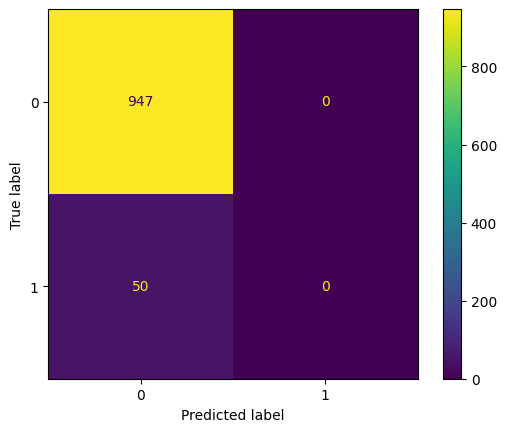

In [222]:

plot_confusion_matrix(estimator=classifier, X=X_test, y_true=y_test)

In [223]:
test_loss, test_acc = model_normalize.evaluate(X_test,  y_test, verbose=1) 

print('Test accuracy:', test_acc)

32/32 [==============================] - 1s 8ms/step - loss: 0.0452 - accuracy: 0.9498
Test accuracy: 0.949849545955658


In [224]:
y_test.value_counts()

0    947
1     50
Name: stroke, dtype: int64

# Recurrent neural networks



In [177]:
texts = pd.read_csv("Poem_classification .csv")
texts.head()

,Genre,Poem
0,Music,A woman walks by the bench I’m sitting onwith ...
1,Music,"Because I am a boy, the untouchability of beau..."
2,Music,"Because today we did not leave this world,We n..."
3,Music,"Big Bend has been here, been here. Shouldn’t i..."
4,Music,"I put shells there, along the lip of the road...."


In [178]:
print('Classes: ', texts['Genre'].unique())
print(texts.groupby(["Genre"]).count())

Classes:  ['Music' 'Death' 'Affection' 'Environment']
             Poem
Genre            
Affection     241
Death         244
Environment   252
Music         249


In [179]:
data = texts.replace({'Environment':0,'Music':1,'Death':2,'Affection':3})

In [180]:
stop_words = stopwords.words('english')

In [181]:
result = pd.concat([data['Genre'], data['Poem'].str.lower()], axis=1)
lower_case=pd.DataFrame(result)
display(lower_case)

,Genre,Poem
0,1,a woman walks by the bench i’m sitting onwith ...
1,1,"because i am a boy, the untouchability of beau..."
2,1,"because today we did not leave this world,we n..."
3,1,"big bend has been here, been here. shouldn’t i..."
4,1,"i put shells there, along the lip of the road...."
...,...,...
981,0,why make so much of fragmentary blue in here a...
982,0,"woman, i wish i didn't know your name. what co..."
983,0,"yonder to the kiosk, beside the creek, paddle ..."
984,0,you come to fetch me from my work to-night whe...


In [182]:
punctuation = string.punctuation+'’'+"—"+'“'+'”'+'–'+'1234567890'
remove_punctuation=[ ''.join([c if c not in punctuation else ' ' for c in text])  for text in lower_case['Poem']]
lower_case['Poem']=remove_punctuation
remove_punctuation=lower_case
display(remove_punctuation)

,Genre,Poem
0,1,a woman walks by the bench i m sitting onwith ...
1,1,because i am a boy the untouchability of beau...
2,1,because today we did not leave this world we n...
3,1,big bend has been here been here shouldn t i...
4,1,i put shells there along the lip of the road ...
...,...,...
981,0,why make so much of fragmentary blue in here a...
982,0,woman i wish i didn t know your name what co...
983,0,yonder to the kiosk beside the creek paddle ...
984,0,you come to fetch me from my work to night whe...


In [183]:
remove_punctuation['Poem'] = remove_punctuation['Poem'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
remove_stopwords=remove_punctuation
display(remove_stopwords)

,Genre,Poem
0,1,woman walks bench sitting onwith dog looks par...
1,1,boy untouchability beautyis subject already bo...
2,1,today leave world embody prominence within eve...
3,1,big bend say call mountains wall must river ne...
4,1,put shells along lip road bivalves last summer...
...,...,...
981,0,make much fragmentary blue bird butterfly flow...
982,0,woman wish know name could silence house front...
983,0,yonder kiosk beside creek paddle swift caque t...
984,0,come fetch work night supper table see leave b...


In [184]:
normalize_data=remove_stopwords

In [185]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_words(text):
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)


normalize_data['Poem'] = normalize_data['Poem'].apply(lemmatize_words)

display(normalize_data)

,Genre,Poem
0,1,woman walk bench sitting onwith dog look part ...
1,1,boy untouchability beautyis subject already bo...
2,1,today leave world embody prominence within eve...
3,1,big bend say call mountain wall must river nev...
4,1,put shell along lip road bivalve last summer d...
...,...,...
981,0,make much fragmentary blue bird butterfly flow...
982,0,woman wish know name could silence house front...
983,0,yonder kiosk beside creek paddle swift caque t...
984,0,come fetch work night supper table see leave b...


In [186]:

words = set(nltk.corpus.words.words())

def clean_sent(sent):
    return " ".join(w for w in nltk.wordpunct_tokenize(sent) if w.lower() in words or not w.isalpha())

normalize_data['Poem'] = normalize_data['Poem'].apply(clean_sent)

display(normalize_data)

,Genre,Poem
0,1,woman walk bench sitting dog look part lab par...
1,1,boy untouchability subject already book lap mi...
2,1,today leave world embody prominence within eve...
3,1,big bend say call mountain wall must river nev...
4,1,put shell along lip road bivalve last summer d...
...,...,...
981,0,make much fragmentary blue bird butterfly flow...
982,0,woman wish know name could silence house front...
983,0,yonder kiosk beside creek paddle swift thou br...
984,0,come fetch work night supper table see leave b...


In [276]:
X = normalize_data.drop(['Genre'], axis = 1)
y = normalize_data['Genre']

In [277]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=500, split=' ') 
X=X.squeeze()
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = tf.keras.utils.pad_sequences(X)

In [278]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 34, 120)           60000     
                                                                 
 spatial_dropout1d_14 (Spati  (None, 34, 120)          0         
 alDropout1D)                                                    
                                                                 
 lstm_14 (LSTM)              (None, 176)               209088    
                                                                 
 dense_38 (Dense)            (None, 4)                 708       
                                                                 
Total params: 269,796
Trainable params: 269,796
Non-trainable params: 0
_________________________________________________________________
None


In [289]:
y=pd.get_dummies(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5, random_state = 42)

In [290]:
batch_size=32
model.fit(X_train, y_train, epochs = 3, batch_size=batch_size, verbose = 'auto')

Epoch 1/3
16/16 [==============================] - 13s 822ms/step - loss: 0.2662 - accuracy: 0.9047
Epoch 2/3
16/16 [==============================] - 10s 613ms/step - loss: 0.2270 - accuracy: 0.9290
Epoch 3/3
16/16 [==============================] - 7s 426ms/step - loss: 0.2110 - accuracy: 0.9290


In [291]:
model.evaluate(X_test,y_test)

16/16 [==============================] - 1s 87ms/step - loss: 1.0538 - accuracy: 0.7201


[1.0537898540496826, 0.7200811505317688]

# Convolutional neural network


In [193]:
import os
for dirname, _, filenames in os.walk('/images/tom_and_jerry'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [194]:
IMAGE_DIRECTORY = "images/tom_and_jerry/"

batch_size = 32
img_height = 72
img_width = 128

In [195]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  IMAGE_DIRECTORY,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5478 files belonging to 1 classes.
Using 4383 files for training.


In [196]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  IMAGE_DIRECTORY,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5478 files belonging to 1 classes.
Using 1095 files for validation.


In [197]:
class_names = train_ds.class_names

/tmp/ipykernel_7462/3793355060.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3, 3, i + 1)


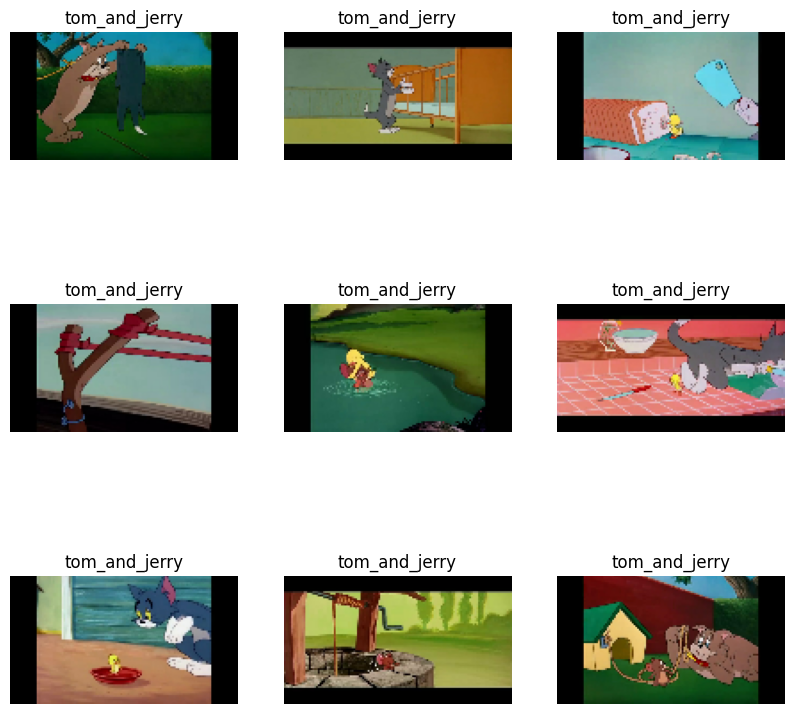

In [198]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [199]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 72, 128, 3)
(32,)


In [200]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [201]:
normalization_layer = layers.Rescaling(1./255)

In [202]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [203]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 72, 128, 3)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 128, 16)       448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 36, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 18, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 18, 32, 64)      

In [204]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


2022-11-10 14:04:35.570389: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 14 of 1000
2022-11-10 14:04:44.979196: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 29 of 1000
2022-11-10 14:04:55.310864: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 46 of 1000
2022-11-10 14:05:04.985306: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 61 of 1000
2022-11-10 14:05:15.122646: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 77 of 1000
2022-11-10 14:05:25.045769: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 92 of 1000
2022-11-10 14:05:35.246511: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer 

137/137 [==============================] - 199s 816ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/15
137/137 [==============================] - 96s 702ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/15
137/137 [==============================] - 86s 623ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/15
137/137 [==============================] - 95s 694ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/15
137/137 [==============================] - 82s 599ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/15
137/137 [==============================] - 72s 526ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/15
137/137 [==============================] - 70s 514ms/step - loss: 0.0000e+00 - ac

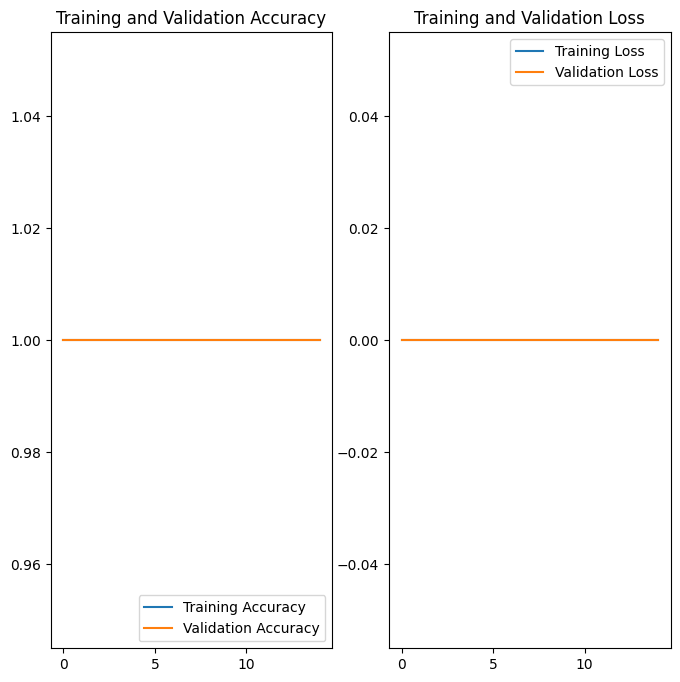

In [205]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Sources


https://keras.io/api/models/sequential/

https://www.projectpro.io/recipes/read-csv-file-tensorlow

https://www.tensorflow.org/tutorials/images/classification

https://www.tensorflow.org/tutorials/load_data/pandas_dataframe

https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews?select=amazon_alexa.tsv

https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/

https://www.analyticsvidhya.com/blog/2021/06/natural-language-processing-sentiment-analysis-using-lstm/

https://www.analyticsvidhya.com/blog/2021/08/beginners-guide-to-convolutional-neural-network-with-implementation-in-python/

https://colab.research.google.com/drive/1m2cg3D1x3j5vrFc-Cu0gMvc48gWyCOuG#forceEdit=true&sandboxMode=true&scrollTo=Pv0XpgwJ7GlW